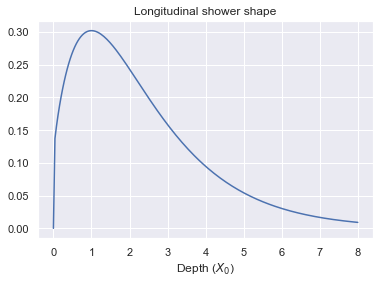

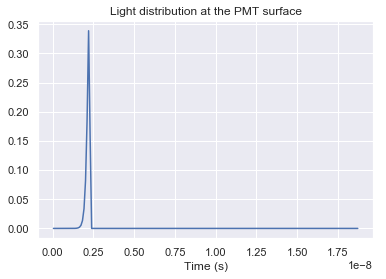

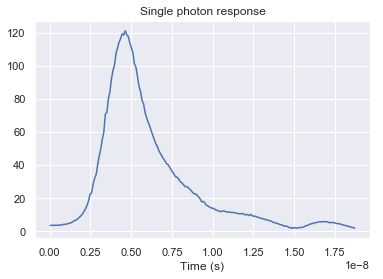

100%|██████████| 1000000/1000000 [00:09<00:00, 108399.10it/s]


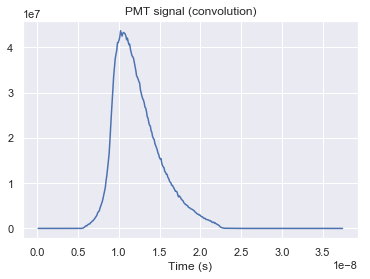

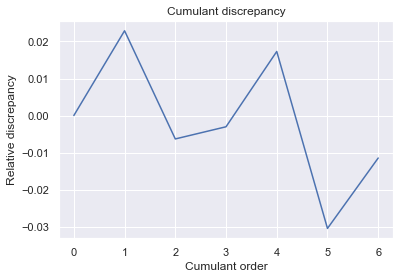

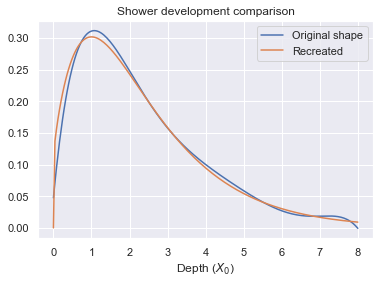

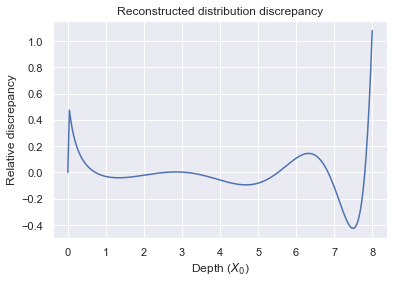

In [20]:
%run pmt_signal.py 1000000 --order 7 --plot

100%|██████████| 100/100 [00:11<00:00,  8.65it/s]


a,b = 1.5454545454545454 1.0 0.032702021954781724 0.032702021954781724


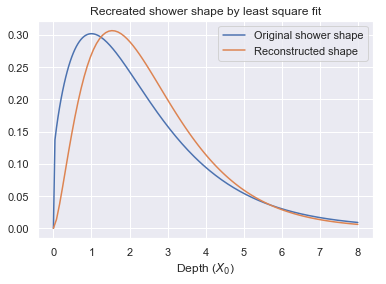

[[ 1.00000000e+00  1.00000000e+00  1.00000000e+00  0.00000000e+00
   4.44089210e-16]
 [ 2.49790989e+00  2.31261657e+00  1.98019394e+00  1.85293316e-01
   3.32422628e-01]
 [ 8.47335287e+00  7.98145863e+00  5.77255084e+00  4.91894246e-01
   2.20890779e+00]
 [ 3.54366926e+01  3.49782411e+01  2.17390961e+01  4.58451518e-01
   1.32391450e+01]
 [ 1.71759074e+02  1.78508832e+02  9.78316740e+01 -6.74975793e+00
   8.06771577e+01]
 [ 9.25208934e+02  1.00818200e+03  4.99638415e+02 -8.29730680e+01
   5.08543587e+02]
 [ 5.38080190e+03  6.10610261e+03  2.79511446e+03 -7.25300716e+02
   3.31098816e+03]]


In [23]:
import math
from matplotlib import pyplot as plt
import numpy as np
import scipy as sc
from tqdm import tqdm
from shower_utils import v, c

m = Distribution.moments_from_cumulants(calc_light_cumulants)
m = [ -m[k]/(1/c-1/v)**(k+1) for k in range(order)]
m = m/m[0]
m_old = sho.moments(order)
#print(np.array([m,m_old]).T)

a_min = 1; a_max = 10
b_min = 1; b_max = 10
ncols = 100
a_list = np.linspace(a_min,a_max,ncols)
b_list = np.linspace(b_min,b_max,ncols)
smatrix = list()
x = np.linspace(0,8,100)

def get_param_dist(a,b):
    x = np.linspace(0,8,100)
    d = Distribution(lambda z, a=a, b=b: z**a*math.exp(-b*z),x)
    d.discretize()
    d.normalize()
    return d

for a in tqdm(a_list):
    smatrix.append(list())
    for b in b_list:
        d = get_param_dist(a,b)
        m1 = d.moments(order)
        s = 0
        for k in range(order): s += (m[k]-m1[k])**2/m[k]**2
        smatrix[-1].append(s)
smatrix = np.array(smatrix)
minv = smatrix.min()
i = smatrix.argmin()
a = a_list[int(i/ncols)]
b = b_list[i%ncols]
print('a,b =',a,b,minv,smatrix[int(i/ncols)][i%ncols])

d = get_param_dist(a,b)
fig = plt.figure()
plt.plot(sho.x, sho.dist_array)
plt.plot(d.x, d.dist_array)
plt.title('Recreated shower shape by least square fit')
plt.xlabel('Depth ($X_0$)')
plt.legend(['Original shower shape', 'Reconstructed shape'])
plt.show()
fig.savefig('graphs/pmt_signal/recreated_fit.png', dpi=200)

a1,a2,a3 = d.moments(order),m,d1.moments(order)
print(np.array([a1,a2,a3,a1-a2,a2-a3]).T)